# The Sparks Foundation

# Presented By: Rahul Kumar Sharma

# Data Science and Business Analytics

# Task 3: Exploratory Data Analysis on dataset SampleSuperstore

# Data Source: https://bit.ly/3i4rbWl

# Problem Statement: 
    1.As a business manager, try to find out the weak areas where you can work to make more profit.
    2.What all business problems you can derive by exploring the data?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:
#Initial Shape of data
data.shape

(9994, 13)

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
#Cleaning the dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Data Cleaning

In [10]:
#Deleting identicle rows to reduce noise from the data
data.drop_duplicates(keep= 'first',inplace=True)
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
#Final Shape of data
data.shape

(9977, 13)

# Exploratory Data Analysis

In [12]:
#Profit and Sales of Company
Sale_Profit = data.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sale_Profit,3) 

Sales     2296195.590
Profit     286241.423
dtype: float64

# Total Sales = 2296195.590 || Total Profit = 286241.423


In [13]:
#Top 10 Sales and Profit State
top_10_sales = data.groupby("State").Sales.sum().nlargest(n =10)
top_10_profit = data.groupby("State").Profit.sum().nlargest(n=10)

In [14]:
print("Top 10 Sales:",top_10_sales)

Top 10 Sales: State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Florida          89473.7080
Illinois         80162.5370
Ohio             77976.7640
Michigan         75879.6440
Virginia         70636.7200
Name: Sales, dtype: float64


In [15]:
print("Top 10 Profit:",top_10_profit)

Top 10 Profit: State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


In [16]:
#Index of top 10 sales state
top_10_sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [17]:
#Index of top 10 profit state
top_10_profit.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

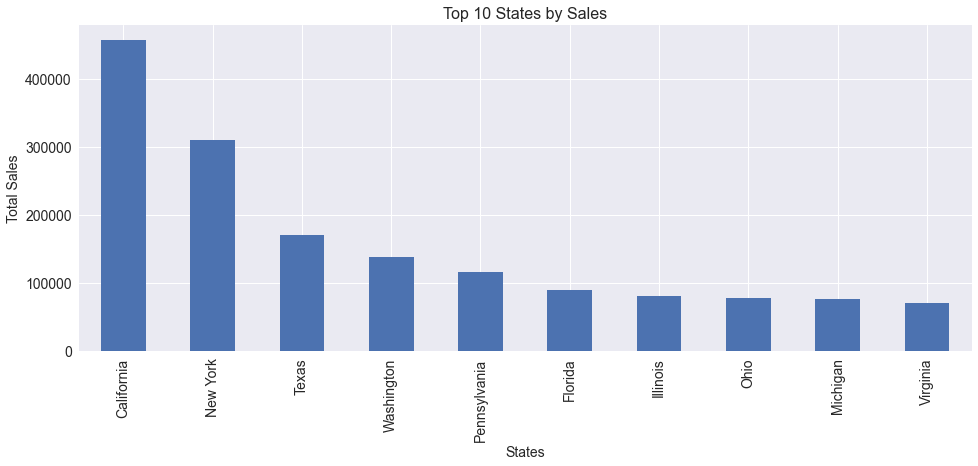

In [18]:
plt.style.use('seaborn')
top_10_sales.plot(kind ='bar', figsize =(16,6), fontsize =14)
plt.xlabel("States", fontsize =14)
plt.ylabel("Total Sales",fontsize =14)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

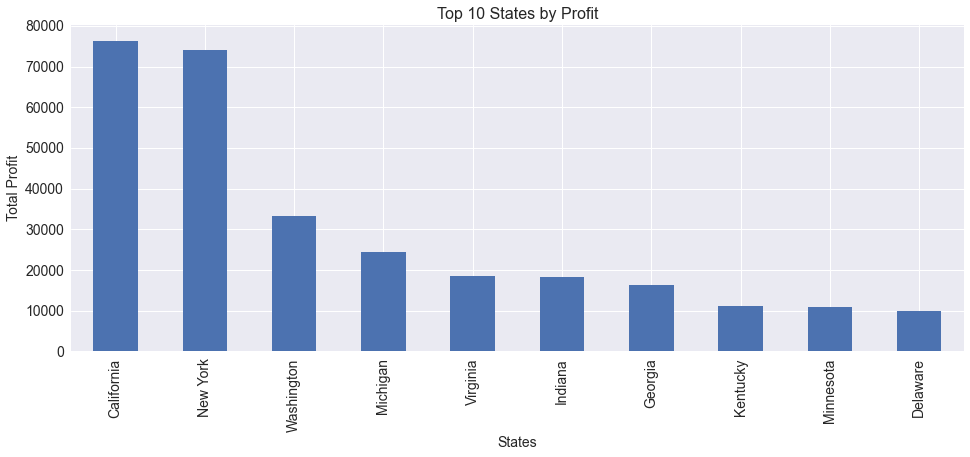

In [19]:
plt.style.use('seaborn')
top_10_profit.plot(kind ='bar', figsize =(16,6), fontsize =14)
plt.xlabel("States", fontsize =14)
plt.ylabel("Total Profit",fontsize =14)
plt.title("Top 10 States by Profit",fontsize =16)
plt.show()

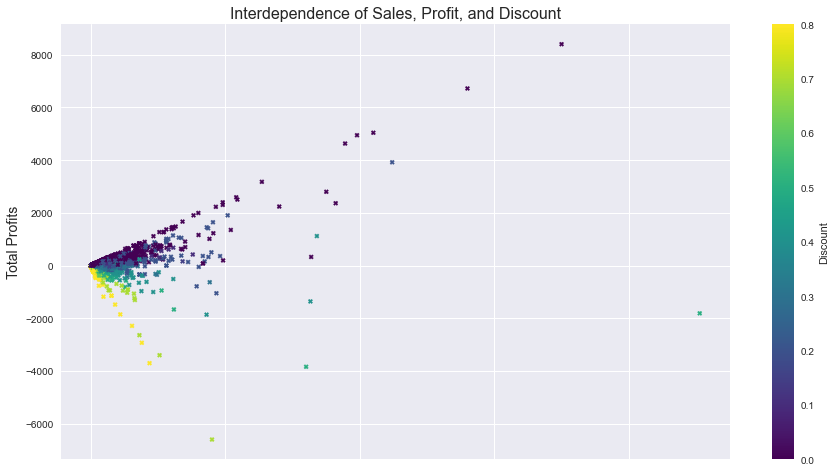

In [20]:
plt.style.use('seaborn')
data.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="X",colormap ="viridis")
plt.ylabel("Total Profits",fontsize =14)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

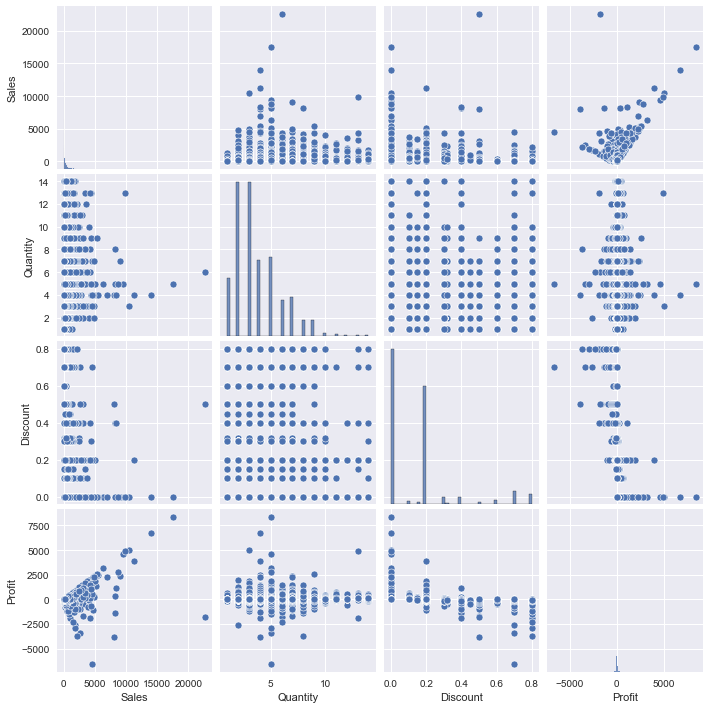

In [21]:
#Relation Analysis
r_analysis=data.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(r_analysis)

<AxesSubplot:>

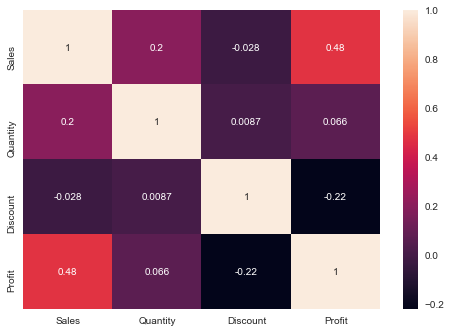

In [22]:
correlation=r_analysis.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In heatmap we see following things:
1. Sales and Profit are positively correlated.
2. Discount and Profit are negatively correlated.

# When Discount = 0

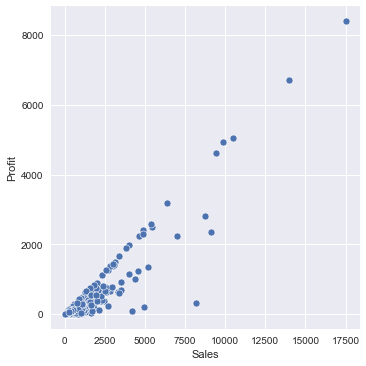

In [23]:
D0=data[data['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=D0)

Positive relation between Profit and Sales when Discount = 0.

<AxesSubplot:>

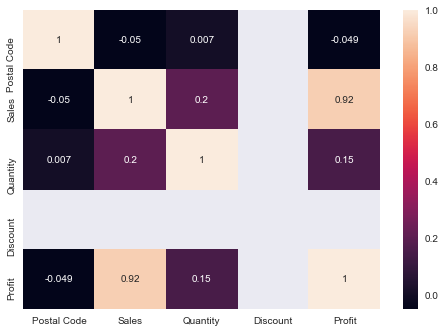

In [24]:
correlation=D0.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

We see strong correlation between Sales and Profit i.e. = 0.92

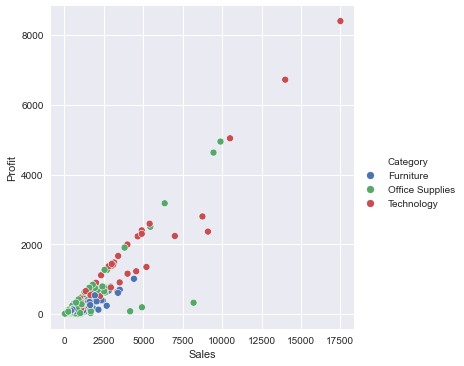

In [25]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=D0)

We see graph of Sales and Pofit of different categories. Technology has the highest Profit and Sales and Furniture has the lowest profit.

<AxesSubplot:xlabel='Category', ylabel='Profit'>

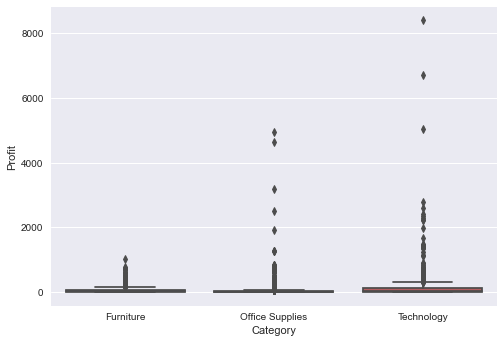

In [26]:
sns.boxplot(x='Category',y='Profit',data=D0)

We see graph of Category and Pofit of different categories. Technology has the highest Profit and Sales and Furniture has the lowest profit.

# When Discount != 0

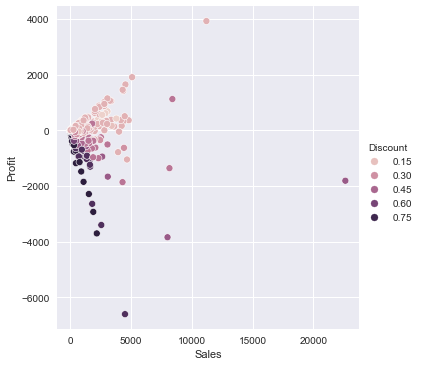

In [27]:
D1=data[data['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=D1)

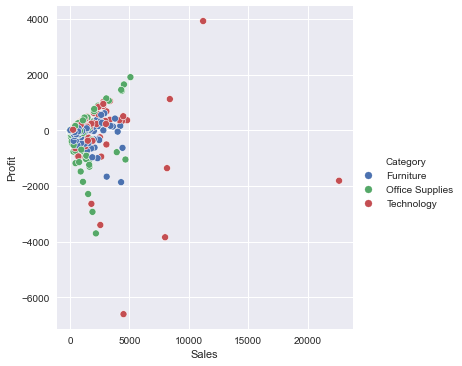

In [28]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=D1)

<AxesSubplot:>

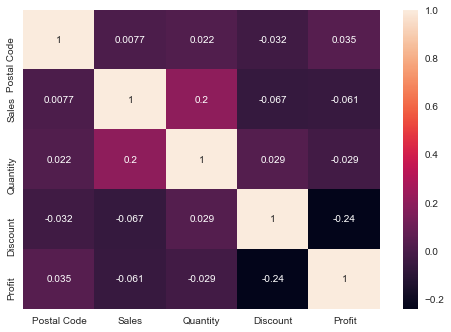

In [29]:
correlation=D1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

# Finding the Highest Profit and Lowest Profit of Product

<AxesSubplot:xlabel='Sub-Category'>

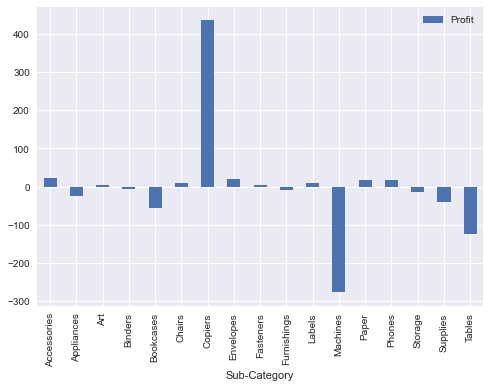

In [30]:
pivot=pd.pivot_table(data=D1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

Copiers have the hightest Profit and Machines have the lowest Profit.

# Finding the Highest Sales and Lowest Sales of Product

<AxesSubplot:xlabel='Sub-Category'>

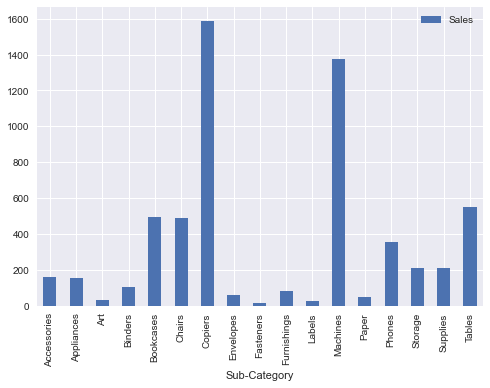

In [31]:
pivot=pd.pivot_table(data=D1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

Copiers have the highest sale, Machines have the second highest sales. 
Fasteners have the lowest sales.

# Profit Across Different Region 

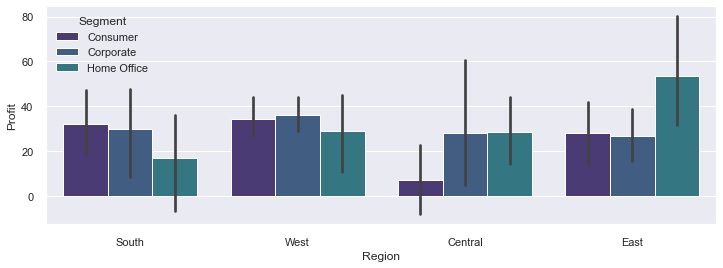

In [32]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = data , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

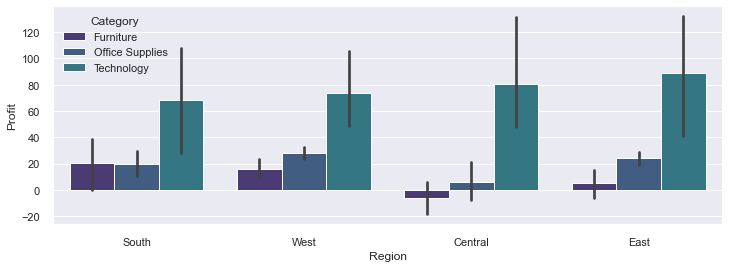

In [33]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = data , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

1. Furniture have the lowest profit in in all four region.
2. Profit goes in negative in Central, East, South.
3. Furniture is the loss making category in Central region.

In [34]:
#Grouping data by region and using only Central region.
central = list(data.groupby("Region"))[0][1]

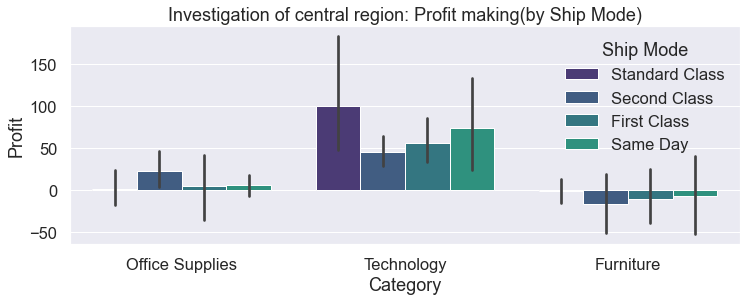

In [35]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

We see loss in Furniture irrespective of shipping mode.

In [36]:
# Using furniture data
category_furniture =list(list(data.groupby("Region"))[0][1].groupby("Category"))[0][1]

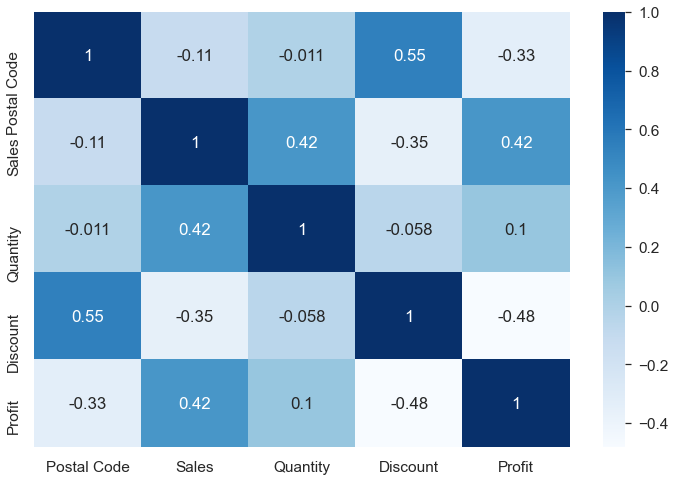

In [37]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(category_furniture.corr() , annot = True, cmap ="Blues")
plt.show()

1. We see positive correlation between Profit and Postal code.
2. We see negative correlation between Discount and Sales.

# Individual performance by states in the central region

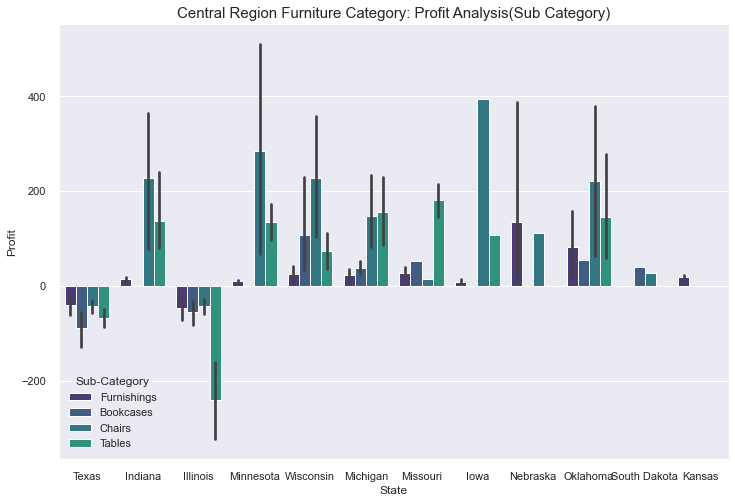

In [38]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = category_furniture , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Central Region Furniture Category: Profit Analysis(Sub Category)", fontsize = 15)
plt.show()

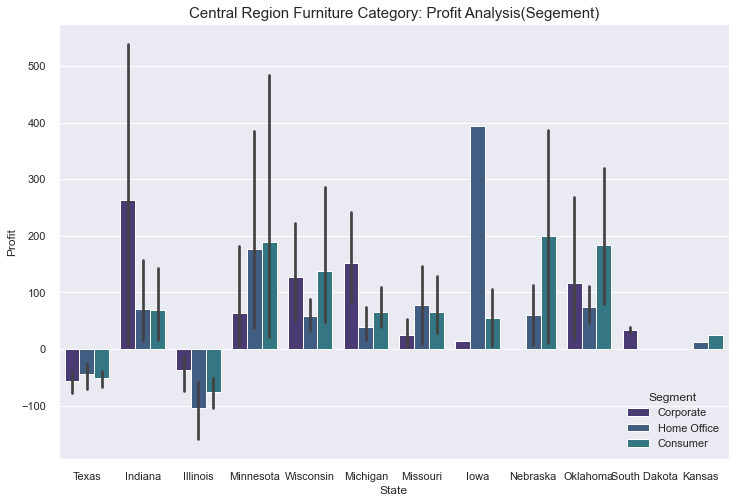

In [39]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = category_furniture , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Central Region Furniture Category: Profit Analysis(Segement)", fontsize = 15)
plt.show()

Texas and Illinois are the only state that contribute in loss.

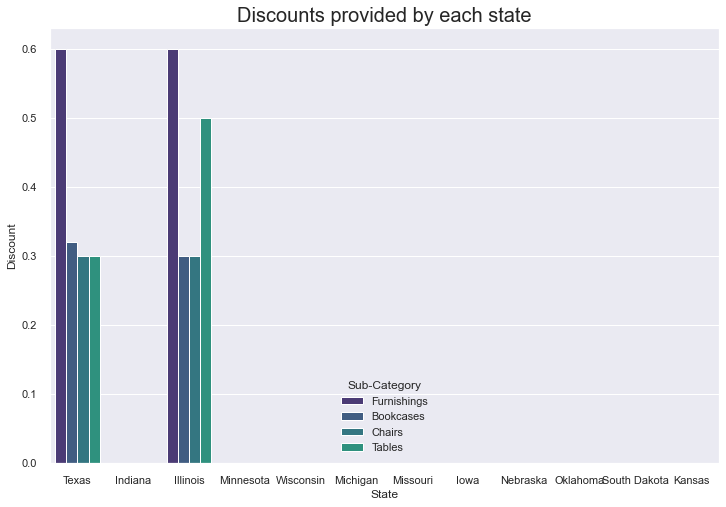

In [40]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = category_furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

1. Discount are very high in the both states.
2. Furnishings give 60% discount.
3. Texas provides 30 % discount on Tables and Illinois provide 50 % discount.
4. Texas provide nearly 35% discount on Bookcases and Illinois provide 30% discount on Bookcases.

<Figure size 864x576 with 0 Axes>

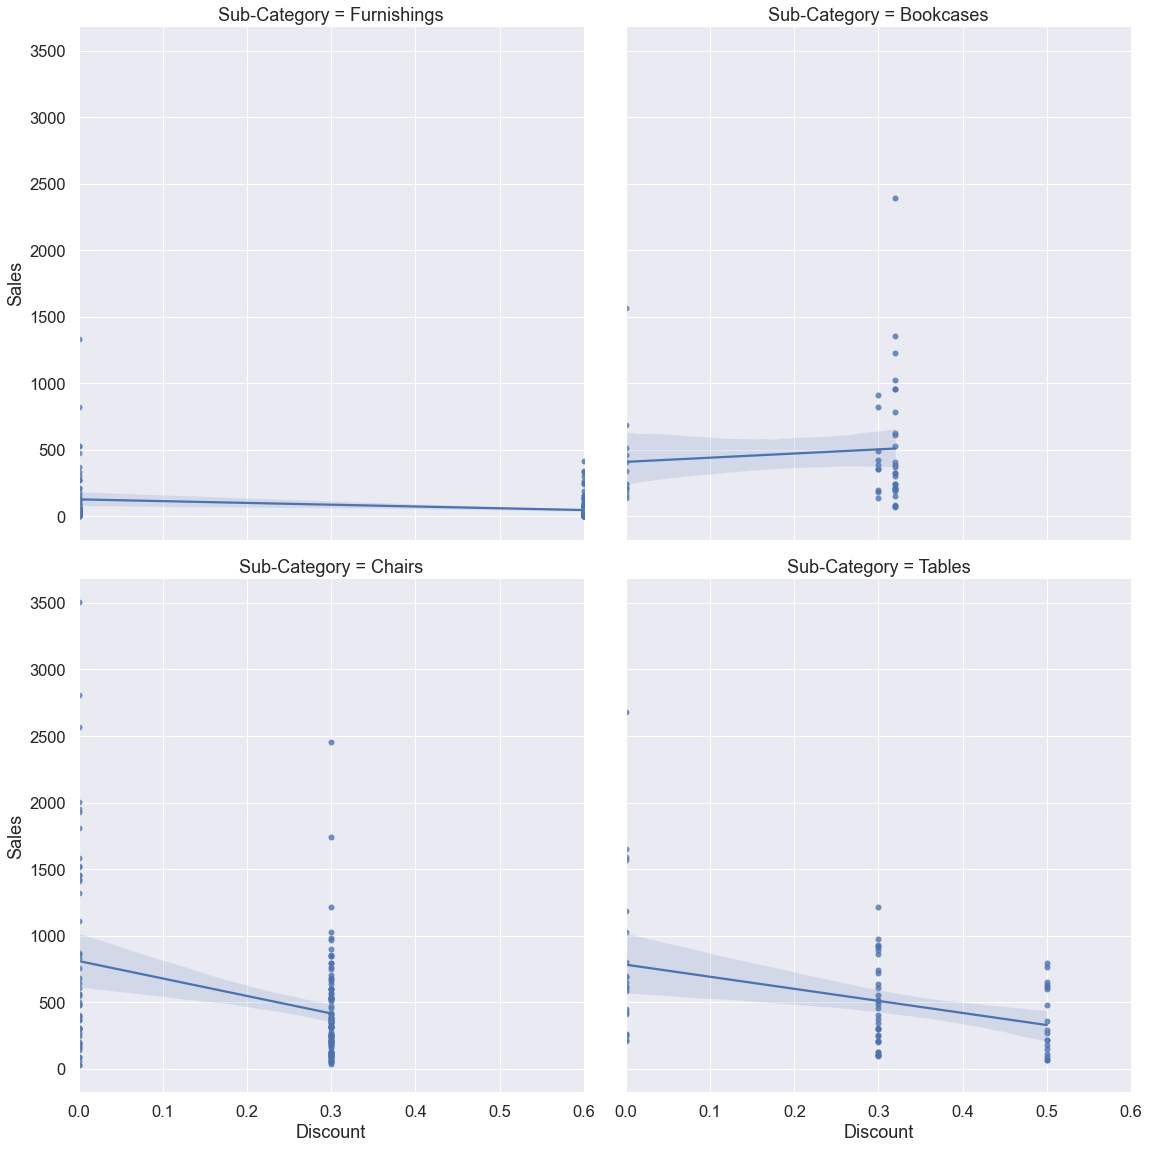

In [41]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = category_furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

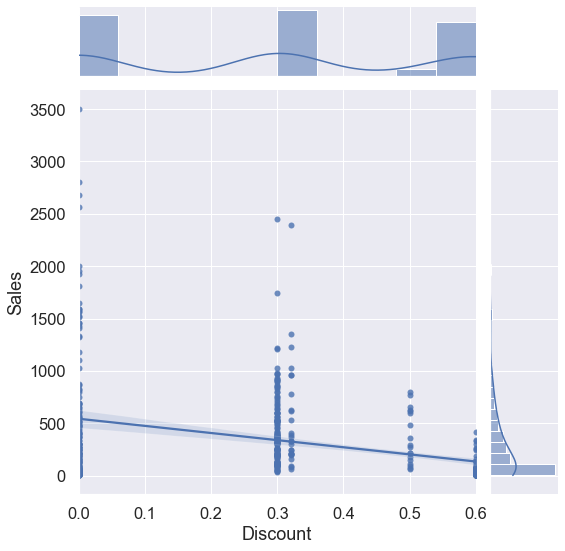

In [42]:
sns.set(font_scale=1.5)
sns.jointplot(data = category_furniture , x = "Discount", y ="Sales", height = 8, kind = "reg")
plt.show()

Sales goes down when discount goes up in 3 and out of 4 sub-categories.

<AxesSubplot:xlabel='Category', ylabel='Profit'>

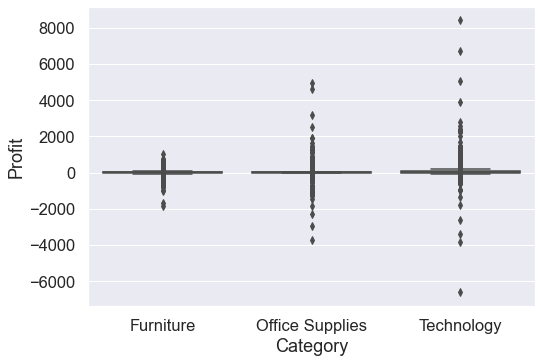

In [43]:
sns.boxplot(x='Category',y='Profit',data=data)

We can see much variation in Technology category while we see less variation in Furniture category.

<AxesSubplot:xlabel='Category'>

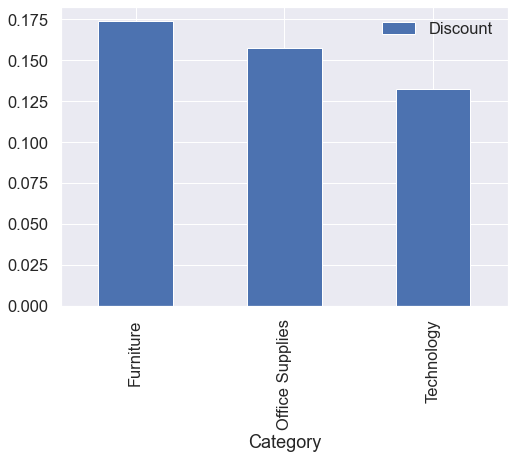

In [44]:
pivot=pd.pivot_table(data,index='Category',values='Discount')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

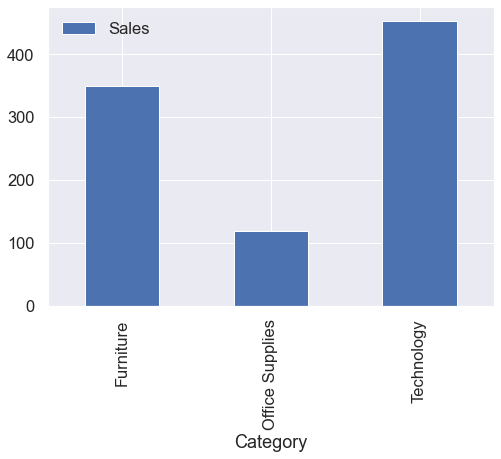

In [45]:
pivot=pd.pivot_table(data,index='Category',values='Sales')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

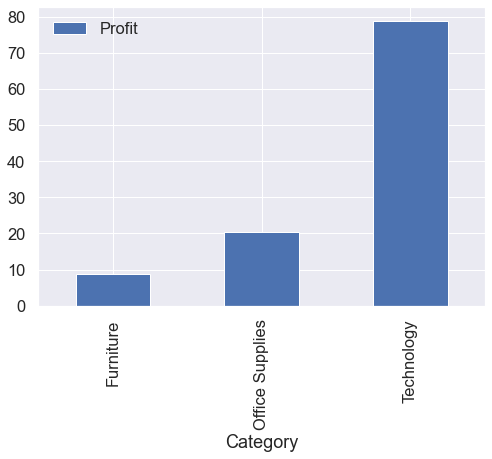

In [46]:
pivot=pd.pivot_table(data,index='Category',values='Profit')
pivot.plot(kind='bar')